In [1493]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1494]:
data_path = "/Users/hannesyilmaz/Desktop/Portofolio/Text-Classification/Book1.csv"

In [1495]:
print(data_path)

/Users/hannesyilmaz/Desktop/Portofolio/Text-Classification/Book1.csv


In [1496]:
data_raw = pd.read_csv(data_path)

In [1497]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 2033
Number of columns in data = 12


**Sample data:**


,Id,Heading,Politik,Utbildning,Religion,Miljo,Ekonomi,LivsstilFritt,SamhalleKonflikter,Halsa,Idrott,VetenskapTeknik
0,1,Åtalad advokat frias från stämpling till mord,0,0,0,0,0,0,1,0,0,0
1,2,”The office” 20 år – så sprängde Ricky Gervais...,0,0,0,0,0,1,0,0,0,0
2,3,Fusk med folkbokföringen ska stoppas,0,0,0,0,0,0,1,0,0,0
3,4,Niklas Orrenius: För mig ligger det svenska hj...,0,0,0,0,0,1,0,0,0,0
4,5,Fängslande surrealistisk film på Mjellby konst...,0,0,0,0,0,1,0,0,0,0


In [1498]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of articles = ",len(data_raw))
print("Number of clean articles = ",clean_comments_count)
print("Number of articles with labels =",(len(data_raw)-clean_comments_count))

Total number of articles =  2033
Number of clean articles =  9
Number of articles with labels = 2024


In [1499]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

Id                    0
Heading               0
Politik               0
Utbildning            0
Religion              0
Miljo                 0
Ekonomi               0
LivsstilFritt         0
SamhalleKonflikter    0
Halsa                 0
Idrott                0
VetenskapTeknik       0
dtype: int64


In [1500]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['Politik', 'Utbildning', 'Religion', 'Miljo', 'Ekonomi', 'LivsstilFritt', 'SamhalleKonflikter', 'Halsa', 'Idrott', 'VetenskapTeknik']


In [1501]:
counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,Politik,451
1,Utbildning,61
2,Religion,15
3,Miljo,118
4,Ekonomi,545
5,LivsstilFritt,248
6,SamhalleKonflikter,698
7,Halsa,241
8,Idrott,151
9,VetenskapTeknik,99


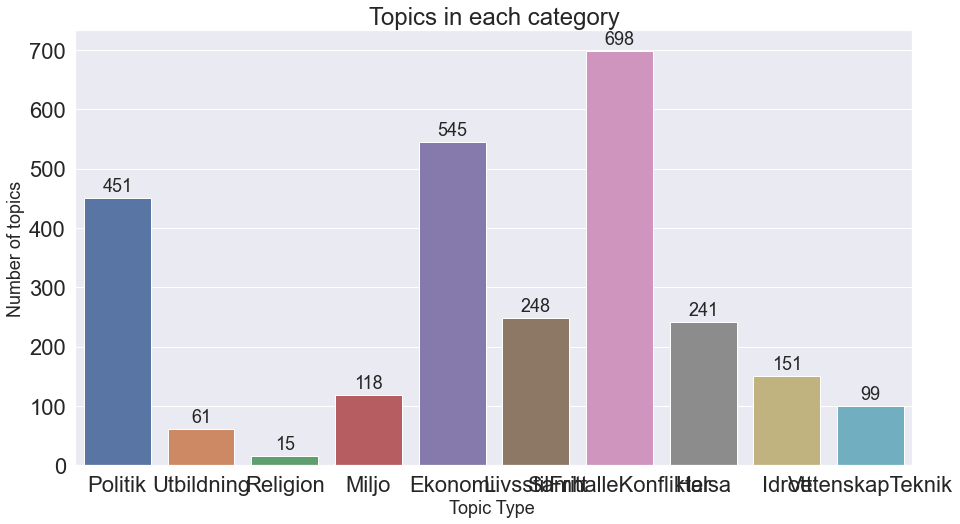

In [1502]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Topics in each category", fontsize=24)
plt.ylabel('Number of topics', fontsize=18)
plt.xlabel('Topic Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

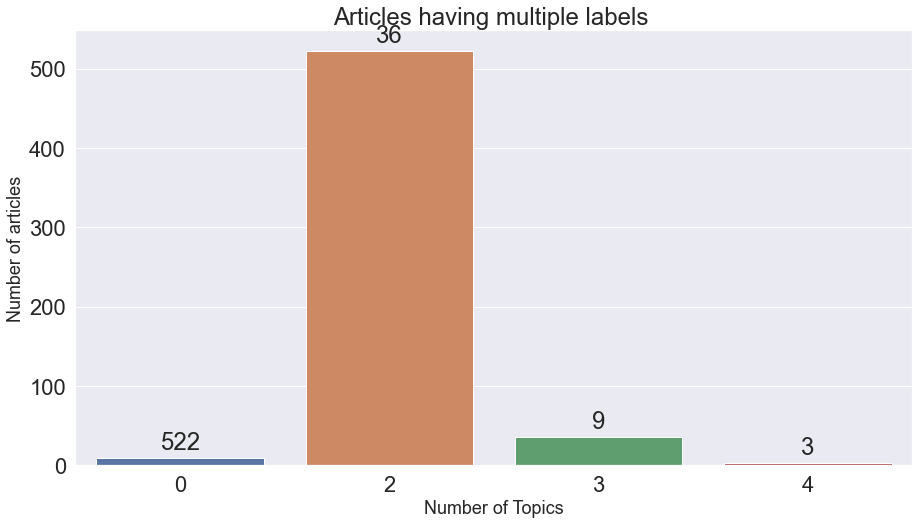

In [1503]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Articles having multiple labels ")
plt.ylabel('Number of articles', fontsize=18)
plt.xlabel('Number of Topics', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

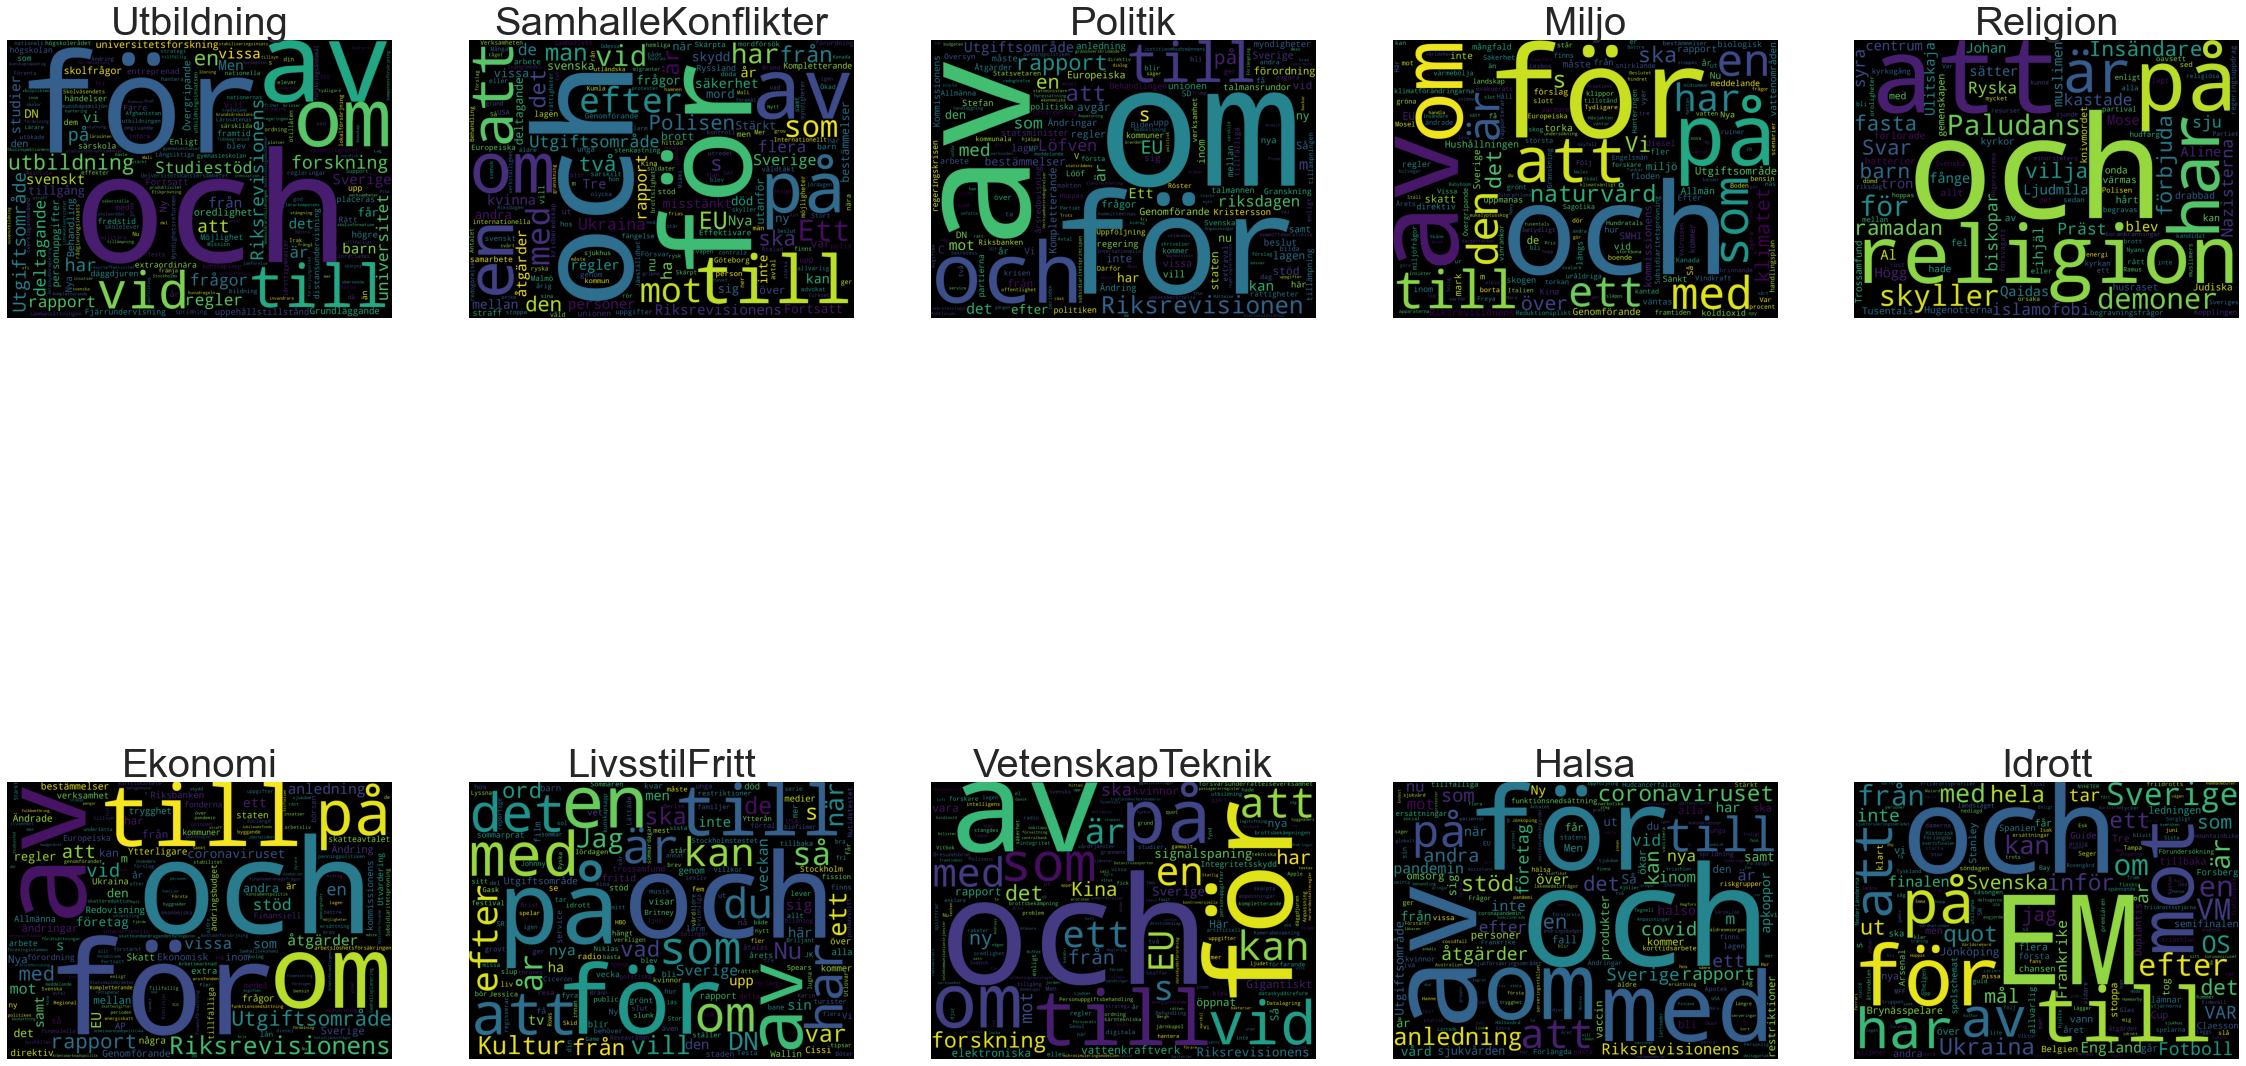

In [1504]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# Utbildning
subset = data_raw[data_raw.Utbildning==1]
text = subset.Heading.values
cloud_Utbildning = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 1)
plt.axis('off')
plt.title("Utbildning",fontsize=40)
plt.imshow(cloud_Utbildning)


# SamhalleKonflikter
subset = data_raw[data_raw.SamhalleKonflikter==1]
text = subset.Heading.values
cloud_SamhalleKonflikter = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 2)
plt.axis('off')
plt.title("SamhalleKonflikter",fontsize=40)
plt.imshow(cloud_SamhalleKonflikter)


# Politik
subset = data_raw[data_raw.Politik==1]
text = subset.Heading.values
cloud_Politik = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 3)
plt.axis('off')
plt.title("Politik",fontsize=40)
plt.imshow(cloud_Politik)


# Miljo
subset = data_raw[data_raw.Miljo==1]
text = subset.Heading.values
cloud_Miljo = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 4)
plt.axis('off')
plt.title("Miljo",fontsize=40)
plt.imshow(cloud_Miljo)


# Religion
subset = data_raw[data_raw.Religion==1]
text = subset.Heading.values
cloud_Religion = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 5)
plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud_Religion)


# Ekonomi
subset = data_raw[data_raw.Ekonomi==1]
text = subset.Heading.values
cloud_Ekonomi = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 6)
plt.axis('off')
plt.title("Ekonomi",fontsize=40)
plt.imshow(cloud_Ekonomi)

# LivsstilFritt
subset = data_raw[data_raw.LivsstilFritt==1]
text = subset.Heading.values
cloud_LivsstilFritt = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 7)
plt.axis('off')
plt.title("LivsstilFritt",fontsize=40)
plt.imshow(cloud_LivsstilFritt)

# VetenskapTeknik
subset = data_raw[data_raw.VetenskapTeknik==1]
text = subset.Heading.values
cloud_VetenskapTeknik = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 8)
plt.axis('off')
plt.title("VetenskapTeknik",fontsize=40)
plt.imshow(cloud_VetenskapTeknik)

# Halsa
subset = data_raw[data_raw.Halsa==1]
text = subset.Heading.values
cloud_Halsa = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 9)
plt.axis('off')
plt.title("Halsa",fontsize=40)
plt.imshow(cloud_Halsa)


# Idrott
subset = data_raw[data_raw.Idrott==1]
text = subset.Heading.values
cloud_Idrott = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 10)
plt.axis('off')
plt.title("Idrott",fontsize=40)
plt.imshow(cloud_Idrott)


plt.show()

In [1505]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=len(data_raw))]
data.shape

(2033, 12)

In [1506]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [1507]:

def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z wåäöÅÄÖ]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


In [1508]:
data['Heading'] = data['Heading'].str.lower()
data['Heading'] = data['Heading'].apply(cleanHtml)
data['Heading'] = data['Heading'].apply(cleanPunc)
data['Heading'] = data['Heading'].apply(keepAlpha)
data.head()

,Id,Heading,Politik,Utbildning,Religion,Miljo,Ekonomi,LivsstilFritt,SamhalleKonflikter,Halsa,Idrott,VetenskapTeknik
1893,2289,slaget om marken i stockholm hårdnar krocketsk...,0,0,0,0,1,1,0,0,0,0
153,154,nazisterna och religion,0,0,1,0,0,0,1,0,0,0
1492,1822,vägar till hållbara vattentjänster,0,0,0,0,0,0,1,0,0,0
1134,1342,behandling av personuppgifter vid hantering av...,0,1,0,0,0,0,0,0,0,1
1986,2382,megan thee stallion och big sean anklagas för ...,0,0,0,0,0,1,0,0,0,0


In [1509]:
nltk.download('stopwords')

stop_words = set(stopwords.words('swedish'))
stop_words.update(['noll','ett','två','tre','fyra','fem','sex','sju','åtta','nio','tio','kunna','också','över','bland','förutom','hursom','än','inom'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['Heading'] = data['Heading'].apply(removeStopWords)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hannesyilmaz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Id,Heading,Politik,Utbildning,Religion,Miljo,Ekonomi,LivsstilFritt,SamhalleKonflikter,Halsa,Idrott,VetenskapTeknik
1893,2289,slaget marken stockholm hårdnar krocketskåp ...,0,0,0,0,1,1,0,0,0,0
153,154,nazisterna religion,0,0,1,0,0,0,1,0,0,0
1492,1822,vägar hållbara vattentjänster,0,0,0,0,0,0,1,0,0,0
1134,1342,behandling personuppgifter hantering oredli...,0,1,0,0,0,0,0,0,0,1
1986,2382,megan thee stallion big sean anklagas låtstöld,0,0,0,0,0,1,0,0,0,0


In [1510]:
stemmer = SnowballStemmer("swedish")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['Heading'] = data['Heading'].apply(stemming)
data.head()

,Id,Heading,Politik,Utbildning,Religion,Miljo,Ekonomi,LivsstilFritt,SamhalleKonflikter,Halsa,Idrott,VetenskapTeknik
1893,2289,slaget mark stockholm hårdn krocketskåp kajaka...,0,0,0,0,1,1,0,0,0,0
153,154,nazist religion,0,0,1,0,0,0,1,0,0,0
1492,1822,väg hållbar vattentjänst,0,0,0,0,0,0,1,0,0,0
1134,1342,behandling personuppgift hantering ored forskning,0,1,0,0,0,0,0,0,0,1
1986,2382,megan thee stallion big sean anklag låtstöld,0,0,0,0,0,1,0,0,0,0


In [1511]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1423, 12)
(610, 12)


In [1512]:
train_text = train['Heading']
test_text = test['Heading']

In [1513]:
my_text = ['Mjällby vände och vann – Nwankwo hjälte mot Degerfors ', 'Vingegaard tog chansen – drygade ut ledningen i Tour de France ', 'Robert Dahlgren tog trippelseger på Ring Knutstorp ', 'Martin Gelin: Bidens besök i Saudiarabien äventyrar kampanjen för demokrati ', 'Skärpta regler ger rekordfå it-haverier Antalet incidenter i bredband- och mobilnät störtdök • Expert: ”Har tagit frågorna på allvar.”', 'MFF:s stjärnvärvning kan bli borta hela säsongen ', '”Journalistiken i poddarna måste få grundlagsskydd” ', 'Martin Gelin: Bannon kan förlora nyckelroll i presidentvalet Donald Trumps tidigare chefsstrateg riskerar två års fängelse.', 'Polisen letade efter knark – hittade bomb ', 'Turkiet kallade upp svensk diplomat ', 'Glas tillbaka i EM-träning efter covidsmittan ', 'Lagarbete gav Leclerc pole position i Frankrike ', 'Sagström klättrade inför majoravslutningen ', 'Sänkte gamla laget i hemmadebuten för MFF ', 'En respektlös resa genom James Joyces sista stora broderi ', 'Spridning av apkoppor ett globalt nödläge WHO utlyser sin allvarligaste varning efter att fall bekräftats i ett 70-tal länder.', 'Daniel Zaar stannar i Rögle: ”Ett ganska enkelt beslut” ', 'Arvid Åhlund: Abortbeslutet kommer leda till en folkstorm – och gynna Republikanerna ', 'Google sparkar anställd som påstod att AI hade känslor ', 'Varning för torka i Portugal – vattenransonering införs ', '”Mondos” bror Antoine Duplantis klar för Sverige – i baseboll ', 'Jörgen Huitfeldt: SVT:s arrogans skadar förtroendet för journalistiken Ansvariga chefer fortsätter att låtsas som det regnar – trots uppenbara fel i två dokumentärer.', 'Familjerelationer och regnbågsfärgade hjältehistorier i nytolkningar av antiken DN:s Jesper Högström läser ”Sången om Akilles”, ”En Odyssé” och ”Galatea”.', 'Ryggproblem kan stoppa svensken Mångkamparen Marcus Nilsson: ”Jag står lite mellan hopp och förtvivlan.”', 'Perseus Karlström: ”Jag går in som storfavorit” Svensken full av självförtroende inför söndagens 35 kilometer gång.', 'Youtubaren: Jag vet inte hur jag blev så populär Anthony Fantano recenserar musik för miljonpublik på sin kanal ”The needle drop”.', 'Ukraina: Ryssar bakom attacken mot Odessa Robotangrepp dagen efter avtal om att öppna hamnen igen • Turkiet: Ryssland förnekar inblandning.', 'Hammarby värvar norsk landslagsman Veton Berisha har skrivit på för fyra och ett halvt år i klubben.', 'Tantrafestivalen tillbaka på Ängsbacka ', 'Tågresenärer fast på tåg i nio timmar Orsakades av elfel i Bräcke kommun – beräknas vara löst tidigast på måndag.', 'Malard gör succé i splittrat Frankrike Från ö i Indiska oceanen till EM-kvartsfinal – Melvine Malard har gjort turneringens snabbaste mål.', 'Naod Habtemichael: Klimatförnekare är dessvärre inte M:s största problem Partiets naiva inställning till klimatförändringar är ett betydligt större.', 'Nederländerna vill ta emot flyktingar till sjöss Utreder att använda kryssningsfartyg vid ankar • Människorättsorganisationer: ”Absurt”', 'Bombastiskt och imponerande arenarock av Iron Maiden Ullevikonserten inleds trevande men vänder i bandets bekvämlighetszon.', 'Före detta hemlös visar upp Berlins baksida Klaus Seilwinder var hemlös i sju år – guidar turister genom stadens parallellsamhälle.', 'Aktivister limmade fast sig i Botticellitavla Tavlan ”Primavera” satt bakom skyddsglas och ska inte ha skadats av aktionen.', 'Skoförsäljaren lever på dansen i Malung Dansbandsveckan tillbaka i bygden – står för 35 procent av näringslivets inkomst.', 'Niklas Wahllöf: Trots värmerekorden tiger politikerna om klimatet Samtidigt uppmanas vi shoppa oss ur katastrofen.', 'Snoop Dogg stäms för sexuella övergrepp ', 'Dags för Sagnia att kvala in i VM Här är lördagens höjdpunkter från friidrotts-VM i Eugene.', 'Polisen missar unga offer för sexköpsbrott Brå: Polis och socialtjänst måste jobba mer uppsökande.', ' ', 'Hanna Fahl: Marie Agerhäll är briljant i detaljerna Hon kommer undan med ett Sommarprat byggt på ”Vad ska jag bli när jag blir stor?”', '”Såg humor som min chans till ett roligt jobb” Petrina Solange har utsetts till årets kvinnliga komiker.', 'Anonym laddhybrid som trilskas vid körning på el ', 'Kan Frankrike bryta EM-förbannelsen? Det händer i EM på lördagen.', 'Swedish House Mafia ställer in konserter ', 'Två uppdaterade vaccin möjliga innan årsskiftet Det första vaccinet ska skydda mot både ursprungsviruset och BA.', '• Rapport från friidrotts-VM: Världsrekord och USA:s nionde guld ', 'Amanda Sokolnicki: Varför ska någon svara på SR:s frågor, när Cilla Benkö vägrar? Det SR sysslat med den här veckan börjar närma sig en parodi.', 'Kommer S hjälpa MP kvar i riksdagen? För att kunna säkra makten behöver Kristersson L – och Andersson är beroende av MP.', 'Seger går kamp mot klockan inför EM-semin Lagkaptenen fick sitta på bänken mot Belgien • ”Jättejobbigt.”', '• Målet i semifinalen: Tysta hemmafansen ', 'McLaughlin krossade världsrekordet Friidrotts-VM i Eugene har fått sitt första världsrekord.', 'Stavhoppskvalet barnlek för Duplantis Vidare till final • ”Hoppas världsrekordtåget ska rulla på”', 'Så undviker du att bli matförgiftad i sommar Kökshygienen viktigt när det blir varmt och fuktigt • En enkel minnesregel kan hjälpa dig.', 'Emma Lukins: En sak står klart –\xa0Sverige har blivit USA ', '3 000 år gammalt fynd splittrar forskare Inristningar påstås vara förbannelse – ifrågasätts av kritiker: ”Kan ha gjorts av misstag.”', 'Även Johnny Depp överklagar förtalsdomen ', 'Bannon fälls för trots mot kongressen Trumps ex-rådgivare har vägrat delta i utredningen.', 'Tecken på vändning för Ukraina Effektiva USA-vapen • Motattacker • Avstannad rysk offensiv.', '• Sembrant avgjorde rysarkvartsfinal: ”Magiskt” ', 'Amat Levin: Dokumentärerna är det mest lärorika att se på svensk tv nu ', 'Ledare: Europa måste förbereda sig på Trumps politiska återkomst ', 'Borgs superlag: Nadal, Federer och Djokovic ', 'BBC stoppar Diana-intervju från 1995 ', '• Norrmannen kritisk till VM-publiken: ”De är helt döda” ', 'Valrossen Freya skapar uppståndelse i Oslo ', '”Hur ska jag orka med min schizofrena syster?” Hon får dåligt samvete för att hon inte klarar elakheterna. Psykiatern Christian Rück ger råd.', 'Nutidstestet vecka 29 – har du hängt med? ', '”Ukrainska soldater är drogade monster” Politiker och tv-profiler ger miljoner ryssar en helt annan bild av kriget.', 'Kvinna från minoritet blir Indiens president ', 'It-säkerhetsexpert dömer ut SR:s säkerhetsarbete ', 'Fyra bad i Stockholm klassas som olämpliga ', 'Ryssland: ”Hela USA kan bli drogberoende” ', 'Så kommer utskällda hockeyfrillan tillbaka ', 'Hanne Kjöller: Samma symtom har fått olika namn – nu talar vi om postcovid ', '• Rysk offensiv mot utländska medier ', 'Stockholmstestet – vad vet du om staden? ', 'Inga nya covidfall i EM-truppen –\xa0men oro bland stjärnorna: ”Blir ett stresspåslag” ', 'DN:s direktrapportering om värmen i Europa ', 'Andrev Walden: Hon kom pulsande tillbaka mot stranden med en slapp liten kropp i händerna ', 'Prisökningar slår hårt mot Tysklands fattiga Ensamstående mamman: ”Värst är att så många basvaror blivit dyrare.”', 'Dikotomi, onkogen och krabbis – vad betyder orden? ', 'Därför klistrar aktivister sig på konst Försöker väcka konstvärldens politiska engagemang med superlim.', 'Här är de vanligaste covidsymtomen just nu ', 'Nutidstestet vecka 28 – har du hängt med? ', 'Stockholmstestet – vad vet du om staden? ', '• Detta har framkommit i utfrågningarna ', 'Andersson leder i statsministermatchen DN/Ipsos: S-ledaren drar ifrån Ulf Kristersson (M).', 'Spelschemat Läs mer', 'Fri DN-prenumeration för unga fram till valet Öppnar sajten för 18–25-åringar • Så läser du gratis – registrera dig här.', '15 bra reportage för lugna sommardagar Läs några av DN:s mest uppmärksammade artiklar.', 'Här är 45 gratisnöjen i Sommarsverige ', 'Osäker inför valet? Gör Valkompassen hos DN Svara på 25 frågor – se hur bra partierna matchar dina åsikter.', 'Så har dancehall fått dem att våga ta plats ', 'Han har bott i samma studentkorridor i 36 år Vill inte lämna rummet – bostaden är orenoverad • ”Känner inga i min egen ålder.”', "Så väckte Disney USA-högerns vrede Kritiserade den så kallade Don't say gay-lagen.", '• Grafik: Rysslands invasion av Ukraina ', 'Live. Tre döda i rysk attack mot militärt flygfält ', '”Min man var otrogen – nu vill han försöka igen” Hon älskar fortfarande exmannen – ska hon ge honom en ny chans? • Psykologen ger råd.', 'DN:s läsare varnas för bluffmejl om bitcoin ', 'Testa din bildning i DN:s kunskapsapp ', 'DN:s expertpanel svarar på dina frågor Fråga om bland annat barn, sömn, stress, träning, relationer.', 'DN:s ungdomspaket för dig mellan 18 och 25 år ', 'Misstänkte 18-åringen gråter i rätten: ”Han vill framföra ett förlåt” ▸\xa0På onsdagen inleddes rättegången efter dådet på Malmö Latinskola. En 18-årig elev har erkänt att han dödat två kvinnliga…', 'SSU-ordförande blev moderat – ”handlar om värderingar” ▸\xa0Elias Sundberg hade varit medlem i Socialdemokraternas ungdomsförbund, SSU, sedan året han fyllde 15.', 'Därför gick Hooters Air i konkurs – efter tre år PLUS Lättklädda tjejer på 10 000 meters höjd visade sig vara en usel affärsidé.', "Turkiet kallade upp svensk diplomat ▸\xa0Det turkiska utrikesdepartementet har kallat upp Sveriges charges d'affaires i Ankara för att markera mot vad man kallar…", 'Alla vill hjälpa Ukraina – men hur länge? ▸\xa0Hjälpviljan är fortsatt stor för miljontals flyende undan Rysslands krig i Ukraina.', 'Uppgifter: Tonårspojken försökte ta sig in hos annan kvinna ▸\xa0En tonårspojke misstänks för grov våldtäkt på en äldre kvinna i Dals-Eds kommun.', 'Experten om apkoppor: ”Oroväckande” ▸\xa0WHO klassar utbrottet av apkoppor som ett globalt hälsonödläge. Virologiprofessorn Niklas Arnberg beskriver utvecklingen…', 'Tsarinnans gömda hårstrån kan lösa kalla fall ▸\xa0I en Fabergémedaljong låg hår från sista ryska tsarinnan gömt. Nu har de över 100 år gamla stråna fått bidra i jakten…', 'Tio döda efter bergras i Kina ▸\xa0Tio anställda vid ett gruvbolag i nordvästra Kina omkom på lördagen när en bergsida gav vika och kollapsade över…', 'Polisen letade efter knark – hittade bomb ▸\xa0Polisen gjorde husrannsakan hos en 53-årig Malmöbo på jakt efter narkotika.', 'Man dömd för Notvikenmord går vidare till HD ▸\xa0Den 20-årige man som mot sitt nekande dömts till 14 års fängelse för mordet på en 25-årig kvinna på Notviken i Luleå för…', 'WHO utlyser globalt nödläge om apkoppor ▸\xa0Världshälsoorganisationen WHO klassar smittspridningen av apkoppor som internationellt hälsonödläge, vilket är…', 'WHO utlyser globalt nödläge om apkoppor ▸\xa0Världshälsoorganisationen WHO klassar smittspridningen av apkoppor som internationellt hälsonödläge, vilket är…', 'WHO: Utbrottet av apkoppor är ett globalt hälsonödläge ▸\xa0Utbrottet av apkoppor fortsätter att öka med hög hastighet. WHO utlyser nu ett globalt hälsonödläge – organisationens…', 'Högt dödstal i politisk våld i Tripoli ▸\xa0Dödstalet stiger efter sammandrabbningar mellan beväpnade grupper i Libyens huvudstad Tripoli.', 'Valrossen Freya har hittats i Norge – ska lämnas ifred ▸\xa0Kändis-valrossen Freya har simmat runt i Europa de senaste månaderna.  Nu har hon upptäckts vid god vigör i Norge.', 'Kvinna knuffade ner man med kryckor framför tåget ▸\xa0En 44-årig kvinna åtalas för mordförsök för att ha knuffat ner en äldre man på tågrälsen framför ett tunnelbanetåg.', 'Klassiska surströmmingen på djupt vatten – kan gå i graven ▸\xa0Årets surströmming från Oskars ser ut att bli den sista. På två år har strömmingsfångsten minskat från 100 ton till 10…', 'Tonårsflicka riskerar bortgifte – får utreseförbud ▸\xa0En flicka i yngre tonåren får utreseförbud efter misstankar om att hennes föräldrar vill gifta bort henne med en man i…', '12-åriga Jonathan fångade jätteblixten på bild ▸\xa0Besökarna på hotellet Järvsöbaden fick bevittna torsdagens oväder på nära håll.', 'Katastrofalt poolparty – man sögs ner i slukhål ▸\xa0Ett 13 meter djupt slukhål öppnade sig i en pool i Israel och ledde till att en man sveptes ner i underjorden.', 'Motorbåt slog runt – man till sjukhus ▸\xa0En motorbåtsolycka inträffade vid Röra-Strand på Tjörn under lördagen.', 'Mängder med regn blir till droppar i veckan ▸\xa0Kraftigt regn orsakade översvämningar i källare och spolade bort asfalt från vägen.', 'Värmebölja sveper in över Kina ▸\xa0Delar av Kina kommer få utstå riktigt höga temperaturer under de kommande tio dagarna, varnar kinesiska…', 'Ryskt angrepp vid Odessa – dagen efter avtal ▸\xa0Hamnen i Odessa har skadats av explosioner. Ukrainas militär uppger att två ryska raketer slagit ner i staden.', 'Krister Thelin ber om ursäkt efter orden om Märta Stenevi <img src="https://static.cdn-expressen.se/images/9a/ae/9aaefe03a911455f86833d6bc79f8157/16x9/265@70.jpg" /><p>I ett inlägg på Twitter gick högerdebattören och tidigare domaren Krister Thelin till angrepp mot MP:s Märta Stenevi och kommenterade hennes utseende.&nbsp;</p><p><em>”Med sina stickande ögon och gälla röst påminner Märta Stenevi om en annan apokalyptisk predikant</em>”, skriver Thelin i ett Twitterinlägg.</p><p>Inlägget fick kraftfulla reaktioner – och Thelin ber om ursäkt för delar av det.</p>', 'Kevin Domaoan Olsson jagade barn att våldta – dömd för 279 sexbrott <img src="https://static.cdn-expressen.se/images/80/09/8009503ca3d64ee486cf94e0ed746c50/16x9/265@70.jpg" /><p>29-årige Kevin Domaoan Olsson från Malmö jagade sina offer på internetplattformar som Discord och Snapchat.</p><p>Sen utsatte han dem för grova våldtäkter och andra sexuella övergrepp.</p><p>– Jag ville bara ha kompisar, säger ett av hans offer, en 12-årig flicka, i förhör.</p><p>Nu har Kevin Domaoan Olsson avslöjats och dömts till totalt elva års fängelse för flera hundra sexbrott mot barn. Det yngsta barnet var fyra år.</p>', 'Uppgifter: Turkiet har kallat upp svensk diplomat <p>Enligt diplomatkällor till nyhetsbyrån Reuters har det turkiska utrikesdepartementet kallat upp en svensk diplomat vid ambassaden i Ankara.&nbsp;</p><p>Mötet väntas handla om anklagelser om ”terroristpropaganda” i Stockholm, skriver nyhetsbyrån.&nbsp;</p>', 'Ryska budskapet – med nya attacken <img src="https://static.cdn-expressen.se/images/a9/c9/a9c9ea68d7f84c7b81089ba3f9171fdd/16x9/265@70.jpg" /><p>Rysslands attack mot Odessa kommer bara en dag efter att landet skrivit på ett avtal om att avbryta blockaden mot ukrainska hamnar.</p><p>Enligt Ilmari Käihkö kan det vara en signal på hur Ryssland egentligen ser på avtalet.&nbsp;</p><p>Men attacken behöver inte innebära ett brott mot densamma.</p><p>– Om det är så att avtalet specifikt säger att det är under pågående exporter som det gäller så har de kanske inte brutit mot avtalet, säger han.&nbsp;</p>', 'Iron Maiden-stjärnans vredesutbrott mot fansen <img src="https://static.cdn-expressen.se/images/64/16/641639b7b5bd4ed9a41113378ef82248/16x9/265@70.jpg" /><p>Bengal i publiken  i Aten – vrålade från scen</p>', 'Man gripen för våldtäkt efter larm om bråk i Huddinge <p>En man har gripits misstänkt för våldtäkt som ska ha skett inomhus i Huddinge.&nbsp;</p>', 'WHO: Apkoppor utgör globalt nödhälsoläge <img src="https://static.cdn-expressen.se/images/19/84/19845f08dace42b4920eb0e53b0a7e4b/16x9/265@70.jpg" /><p>WHO uppger nu att apkoppor utgör ett globalt nödhälsoläge.</p><p>Den högsta spridningen sker i Europa, och är fortfarande koncentrerad till män som har sex med män.</p><p>– Med rätt strategier i rätt grupper kan utbrottet stoppas, säger WHO:s generalsekreterare Tedros Adhanom Ghebreyesus.</p>', 'Håll ut – badvädret på väg tillbaka <img src="https://static.cdn-expressen.se/images/0b/c4/0bc436fbf1fc4c5e9a8da03e0de1505c/16x9/265@70.jpg" /><p>Meteorologen: Sol och sommarväder på ingång</p>', 'Båt voltade vid Tjörn – man till sjukhus <img src="https://static.cdn-expressen.se/images/23/37/2337bc80fad94112b544895110337592/16x9/265@70.jpg" /><p>Två personer har skadats i en båtolycka i närheten av Tjörn.</p><p>En av dem, en man i 60-årsåldern, har förts till sjukhus.</p><p>– Vittnen skrek att båten kom in med hög fart och voltade, säger Anders Lennholm, biträdande räddningsledare på Sjö- och flygräddningscentralen till TT.</p>', 'Kvinna attackerade man med kniv i Umeå <img src="https://static.cdn-expressen.se/images/56/81/56816c37564245dc96012bdeb0d461fc/16x9/265@70.jpg" /><p>En kvinna i Umeå sitter anhållen misstänkt för grov misshandel efter att han attackerat en man med en kniv under fredagskvällen, skriver <a href="https://www.vk.se/2022-07-23/kvinna-anhallen-misstankt-for-att-ha-attackerat-man-med-kniv">Västerbottens-Kuriren</a>.</p><p>Enligt tidningen ska mannen fått en sårskada och behövt sjukhusvård.</p>', 'Över hundra resenärer fast på SJ-tåg i nio timmar <img src="https://static.cdn-expressen.se/images/da/15/da15787aeaea456cbcf15b828a82bbe0/16x9/265@70.jpg" /><p>Christa Braniff, 79, strandades i Borlänge under fredagens tågkaos.</p><p>– Det var helt fullpackat och folk satt på golvet, säger hon.</p><p>På ett annat tåg fastnade folk i över nio timmar – utan mat och toalett.</p><p>Nu rasar folk mot SJ.</p>', 'Ukrainska flyktingar möter  sträng abortlagstiftning i Polen <img src="https://static.cdn-expressen.se/images/39/2e/392e5c9a0b2340daab7bda9045158d04/16x9/265@70.jpg" /><p>Ukrainska flyktingar som flytt kriget möter stränga abortlagar i Polen.</p><p>Samtidigt ökar antalet våldtäktsanklagelser mot ryska soldater i samband med att fler ukrainska kvinnor vill göra aborter – och är i behov akuta preventivmedel i Polen, rapporterar <a href="https://www.sbs.com.au/news/dateline/article/ukrainian-refugees-raped-by-rface-polands-strict-abortion-laws/ombns9xvc">SBS News</a>.</p><p>– Kvinnor är rädda, de vill inte ses som vittnen till krigsförbrytelser och våldtäkter, säger Krystyna Kacpura vid den icke-statliga polska organisationen FEDERA till nyhetskanalen.&nbsp;</p>', 'Man gripen för våldtäkt på Gotland <img src="https://static.cdn-expressen.se/images/d0/97/d0977e39dd784d01823a024a2b473478/16x9/265@70.jpg" /><p>En man har gripits på Gotland, misstänkt för våldtäkt av en kvinna han har en nära relation med.</p>', 'Värmen – klimatförändring eller tillfällighet? <img src="https://static.cdn-expressen.se/images/e0/d2/e0d223fe982845e38c4e8cb4269be189/16x9/265@70.jpg" /><p>Stora delar av Europa har drabbats hårt av rekordtemperaturer, torka och omfattande skogsbränder.</p><p>Men handlar allt om klimatförändringen? Eller är extremvärmen bara en tillfällighet?</p><p>Vi reder ut frågorna.</p>', 'Klimatkritiken mot kändisarnas flygvanor: ”Total likgiltighet” <img src="https://static.cdn-expressen.se/images/c8/d6/c8d654b5d73b49a8b92ba5628a96dff7/16x9/265@70.jpg" /><p>Kylie Jenner har kritiserats hårt efter att det avslöjats att hon tog sin privatjet för en 17 minuter lång flygresa.</p><p>Men realityprofilen är långt ifrån den enda kändisen med liknande flygvanor.</p><p>Twitter-kontot Celebrity Jet avslöjas hur de superrika fortsätter flyga många – ofta korta – privatjetresor mitt under brinnande klimatkris, rapporterar <a href="https://www.theguardian.com/environment/2022/jul/21/kylie-jenner-short-private-jet-flights-super-rich-climate-crisis">The Guardian</a>.</p>', 'Översvämning i Iran – flera döda <p>En översvämning i provinsen Fars i sydvästra Iran har kostat flera människor livet. Enligt en statlig tv-kanal rör det sig hittills om över 20 personer.</p>', 'MORGONENS NYHETER: Sanningen om Linda Sembrants målgest • Vita husets coronabesked: Biden mår bra • Röster inom S vill hjälpa MP ur krisen <p>Sverige är vidare i fotbolls-EM efter att Linda Sembrandt skickat in 1-0 på tilläggstid i kvartsfinalen mot Belgien. Nu väntar semifinal mot värdnationen England.</p><p>￭￭￭</p><p>USA:s president Joe Biden säger sig vara på bättringsvägen efter tre dagars coronasjukdom. I en uppdatering över videolänk från sin isolering i Vita huset ger han tummen upp till pressen.</p><p>￭￭￭</p><p>Opinionsmätningarna visar att Miljöpartiet ligger illa till inför höstens riksdagsval. Nu höjs röster inom Socialdemokraterna för att hjälpa sin forna regeringspartner.</p><p>￭￭￭</p><p>Expressen ger dig morgonens nyheter.</p>', 'Röster inom Socialdemokraterna vill ge Miljöpartiet draghjälp <img src="https://static.cdn-expressen.se/images/9c/f9/9cf9a2ed1257421a9e732c9705f421b6/16x9/265@70.jpg" /><p>Miljöpartiet ligger under riksdagsspärren i opinionsmätningarna.</p><p>Nu höjs röster inom Socialdemokraterna för att hjälpa den forna regeringspartnern att stanna kvar i riksdagen, skriver <a href="https://www.dn.se/sverige/anderssons-slangkyss-till-bolund-ska-s-hjalpa-mp-nu/">Dagens Nyheter.</a></p><p>– Det kommer inga attacker mot MP från S, säger statsvetaren Jonas Hinnfors till tidningen.</p>', 'Man antastade kvinna vid busshållplats i Huddinge <img src="https://static.cdn-expressen.se/images/04/0a/040aee0793fe49cf848a384c07a705f1/16x9/265@70.jpg" /><p>Under natten till lördagen blev en kvinna vid en bushållplats i Huddinge centrum antastad av en man.</p><p>Polisen lyckades med ett gripande efter att en trygghetsvärd följt efter mannen.</p>', 'Tre till sjukhus i Skara – kan ha fått spetsad dryck <img src="https://static.cdn-expressen.se/images/5a/2b/5a2b8ed1a75a45adb2ad2bd930a87fb6/16x9/265@70.jpg" /><p>Tre personer har förts till sjukhus i Skara kommun för kontroll.</p><p>Detta efter att de kan ha fått i sig spetsad dryck i samband med en festival.</p><p>– De påträffas av polis på det här området och är påverkade av någonting, de misstänker att de fått något i sig genom en drink, säger polisens presstalesperson Anna Göransson.</p>', 'Resekaos i Dover - brexit får skulden <p>Tusentals semesterlediga brittiska familjer har fastnat i köer i hamnen i Dover, i väntan på att resa över Engelska kanalen till Frankrike. Fackföreningar, hamntjänstemän och franska myndigheter skyller köerna på brexit.</p>', '”Sänkt reduktionsplikt dråpslag för bioenergin” <p>Biodrivmedelsaktörer: Nu finns politiska förslag om reduktions\xadplikten som riskerar att reversera klimat\xadpolitiken över ett decennium, öka inblandningen av fossilt och eliminera cirka 80 procent av marknaden för biodrivmedel.</p>', 'Han följde Trump inför stormningen <p>Kaos i leden på anarkistfestival, unika inspelningar med Donald Trump och norsk true crime-dokumentär. SvD guidar till nyheter på HBO Max, Netflix, SVT Play och övriga streamingtjänster.</p>', 'Alla vill hjälpa Ukraina – men hur länge? <p>Hjälpviljan är fortsatt stor för miljontals flyende undan Rysslands krig i Ukraina. Men hur länge ska hjälpare och hjälpta härda ut? Och vad händer sedan?</p>', 'Nyförvärvet kan bli borta hela säsongen <p>Stjärnvärvningen Mahamé Siby bars ut på bår och fördes akut till sjukhus.</p><p>Efteråt talade Malmö FRF:s fysioterapeut Pär Herbertsson om en höftskada och uteslöt spel i nästa veckas kvalmatch mot Zalgiris.</p><p>– Det kan handla om hela säsongen.</p>', 'Tsarinnans hårstrån kan lösa kalla fall <p>I en Fabergémedaljong låg hår från sista ryska tsarinnan gömt. Nu har de över 100 år gamla stråna fått bidra i jakten på nya sätt att lösa kalla fall.</p><p>Med hjälp av svenska Rättsmedicinalverket har FBI hittat en ny metod för att analysera dna i hår – något som ofta är mycket svårt.</p>', 'Rekordmånga skaffar tidsfrist via pantbanken <p>Utlåningen hos Pantbanken Sverige har skjutit i höjden det senaste halvåret.</p><p>– Inflationen har tagit alla på sängen, säger bankens vd Peter Sundström.</p>', 'Tio döda efter bergras i Kina ', 'Där barn förvandlas till olustiga panelhöns <p>”Det mänskliga uppdraget” av Sven Fagerberg har nästan 40 år på nacken, men temat är tidlöst: en plädering för mångfald och kreativitet i alla dess former.</p>', 'Teamkörning gav Leclerc pole i Frankrike <p>Ferraris Charles Leclerc får starta längst fram i söndagens GP i Formel 1. Ferrari använde sig av teamkörning för att få honom dit.</p>', 'Svenska Edvard dog i ryskt granatregn <p>I måndags dödades Uppsalabon Edvard Selander Patrignani av rysk artillerield. Tobias Engqvist hann precis undan, och blev den som kontaktade Edvards familj. ”Han var en väldigt bra kamrat”.  </p>', 'Hanna Glas tillbaka i träning ', 'Sänkte gamla laget i hemmadebuten för MFF <p>Han gjorde hemmadebut för Malmö FF. Och han gjorde det mot sitt tidigare klubb Sirius.</p><p>Med ett mål och två assist sänkte Moustafa Zeidan sina tidigare lagkompisar.</p><p>– Bra spelare förstår varandra, säger han med ett skratt.</p>', 'WHO utlyser globalt nödläge om apkoppor <p>Under lördagen meddelade Världshälsoorganisationen att spridningen av apkoppor klassas nu som ett globalt hälsonödläge.</p><p>– Vi måste agera tillsammans och vi måste agera nu, säger WHO:s chef för krisberedskap Michael Ryan.</p>', 'Duplantis väljer svenska basebollandslaget <p>Antoine Duplantis, Armands äldre bror, är klar för det svenska basebollandslaget. Det meddelar förbundet på sociala medier.</p>', 'Högt dödstal i politisk våld i Tripoli <p>Dödstalet stiger efter sammandrabbningar mellan beväpnade grupper i Libyens huvudstad Tripoli.</p><p>Rivaliserande beväpnade grupperingar slåss om inflytande i det sargade landet.</p>', 'Bestulen på en timme av mitt liv? Japp <p>Krig, incels och kontraproduktiva fängelsevistelser. SvD:s Christian Daun tipsar om årets hittills bästa ”Sommar i P1” – och varnar för bottennappen.</p>', 'Bergqvist om Duplantis: &quot;Mental superkraft&quot; <p>Sveriges förbundskapten Kajsa Bergqvist hyllar och imponeras av friidrottens allra största stjärna:</p><p>Armand Duplantis.</p><p>– Han har en mental superkraft som är fantastisk, säger hon inför VM-finalen natten till måndag.</p>', 'Avtal kan dämpa inflation – men det tar tid <p>Det avtal som både Ryssland och Ukraina har ingått i – som ska tillåta transport av spannmål och gödningsmedel genom Svarta havet – kan om det följs leda till att den rusande inflationen dämpas.</p><p>Men det dröjer tills vi får se priseffekter, anser de experter som TT har pratat med.</p>', '”Jag gör det möjligt för min dotter att missbruka” <p>Kan man stänga av telefonen trots att ens barn kanske behöver hämtas mitt i natten? Kan man kasta ut henne på gatan? Niklas dotter missbrukar droger – men har länge nekat hjälp.</p>', 'L: Inför ett nytt avdrags\xadgillt pensions\xadsparande <p>Det behöver bli lättare att spara till pensionen. Därför föreslår vi ett nytt avdrags\xadgillt pensions\xadsparande där upp till 1\xa0000 kronor i månaden kan sättas av, skriver Mats Persson och Gulan Avci, L.</p>', 'Streamingkrig hårdnar: ”Rena rama Klondyke” <p>Vid operan i Oslo pågår något hemligt: inspelningen av årets stora julserie på Netflix. I närheten spelas den tredje säsongen av ”Pörni” in för Viaplay. Streaming har fått den nordiska tv-branschen att explodera. Men håller det på att vända?\xa0</p>', 'Tonårsflicka riskerar bortgifte – får utreseförbud ', 'Katastrofalt poolparty – man sögs ner i slukhål <p>Ett 13 meter djupt slukhål öppnade sig i en pool i Israel och ledde till att en man sveptes ner i underjorden.</p><p>Nu anklagas poolägarna för att ha byggt bassängen utan tillstånd.</p>', 'Omtumlande dramatik när von Trier blir opera <p>I Lars von Triers film ”Breaking the waves” från 1996 finner man ett klassiskt operamotiv: kvinnomartyren. Nu får Missy Mazzolis opera baserad på filmen premiär på Vadstena-Akademien.</p>', 'Motorbåt slog runt – man till sjukhus ', 'Karlström jagar ny medalj: &quot;Storfavorit&quot; <p>Foten gör inte längre ont och skavsåret är nästintill läkt.</p><p>Förutsättningar som gör att Perseus Karlström siktar på en ny VM-medalj i Eugene.</p><p>– Jag går in som storfavorit i det här loppet, säger han.</p>', 'Mängder med regn blir till droppar i veckan <p>Kraftigt regn orsakade översvämningar i källare och spolade bort asfalt från vägen.</p><p>De värsta skurarna har passerat, men molnen kommer inte att skingras, enligt SMHI:s meteorolog Linus Karlsson.</p>', 'Sverige inte favorit mot England – passar perfekt <p>Det satt oväntat hårt inne. Men Linda Sembrandts sena mål mot Belgien tog Sverige till semifinal i EM. Där slår Blågult ur underläge mot England. Och lär komma med en och annan överraskning.</p>', 'Värmebölja sveper in över Kina ', 'Norrköpingsbo hade tusentals bilder\xa0med barnporr <p>En man i 60-årsåldern i Norrköping har åtalats för grovt barnpornografibrott.</p>', 'Sagnia inför\xa0VM-entrén: ”Fint att vara tillbaka där jag presterat” <p>I kväll gör den sista svensken entré i friidrotts-VM i USA.</p>', 'Glädjande svenskbesked: Hanna Glas\xa0tillbaka i träning <p>Hanna Glas fick stå över kvartsfinalen mot Belgien då hon visade upp symptom.</p>', 'Utlandssvenskar mister sin garantipension\xa0– drabbar 47 000 – “Under all kritik” <p>Många drabbade hör av sig till organisationen Svenskar i Världen.</p>', 'Pensionärsorganisation kritisk mot Moderaternas “Äldrefridsbrott” <p>Föreningen SPF Seniorerna är kritisk till förslaget.</p>', 'WHO: Apkoppor en global hälsokris <p>Beslutet från WHO kommer sedan smittspridningen bekräftats i över 70 länder.</p>', 'Bytte prislappar mot info om kriget – riskerar 10 års fängelse i Ryssland <p>31-åringens advokat: “Tyvärr en ny verklighet”.</p>', 'Skolbarn hjälper sportfiskare att hitta främmande arter <p>Den svartmunnade smörbulten riskerar att konkurrera ut inhemska arter.</p>', 'Tornseglaren hotas av\xa0sommarvärmen\xa0– ungarna\xa0hoppar ur sina bon <p>Bygger bon under plåttak: Så kan du göra för att hjälpa till.</p>', 'Polisen vill skärpa arbetet mot barn- och ungdomsrelaterade sexköpsbrott <p>Fler regioner ska arbeta uppsökande för att upptäcka brott mot barn och unga.</p>', 'Bannon efter domen: Slaget må vara förlorat, men inte kriget <p>Döms för trots mot den kongresskommitté som utreder händelsen.</p>', 'Pridetåg i Budapest trots trakasserier efter ny lag <p>Sveriges Radios utsända Dzenet Alisehovic rapporterar från Budapest.</p>', 'Nu ska båtfolket lära sig ecodriving <p>Rätt körteknik kan minska både kostnader och utsläpp. </p>', 'Zelenskyj: ”Ryssland hittar alltid sätt att inte uppfylla det de lovat” <p>Attacken sker dagen efter att spannmålsavtalet undertecknades.</p>', '”Mordoffer” var dumpad sexdocka <p>”Kroppsdelar” i Ikea-kasse hittades i skogen i Jälla. </p>', 'Sydkorea öppnar för Nordkoreanska medier <p>Förhoppningen är att Nordkorea ska ta steg i motsvarande riktning.</p>', 'Strömmingsläget i Norrbotten: ”Det är katastrof” <p>Vd:n på BD fisk: ”Gamla traditioner och företag tvingas läggas ner.”</p>', 'Tre personer till sjukhus – misstänks ha fått spetsad dryck <p>Rubricerat som misstänkt misshandel.</p>', 'Miljon-notan efter Paludan –\xa0polisen: ”Velat lägga pengarna på annat” <p>Under 2022 har Paludans sammankomster kostat polisen många miljoner kronor. </p>', 'Här är solcellernas farliga baksida för brandmän <p>Brandingenjören efterlyser tydligare regler för säkerhet.</p>', 'Nyheter från dagen: 23 juli Detta är ett urval av vad som hänt i Västra Götaland under lördagen den 23 juli.', 'Efter olyckorna i vindkraftverk: ”Det är inte samma marginaler som när det handlar om flygplan” I takt med att det byggs fler och större vindkraftverk sker också fler olyckor.\xa0 \n– Det är inte samma marginaler som när det gäller flygplan eller hissar, som personer normalt färdas i, förklarar experten Anders Wickström.', '16-åring fortsatt anhållen misstänkt för grov våldtäkt på äldre kvinna Tonårspojken, som misstänks för grov våldtäkt mot en äldre kvinna i Dals-Ed, är fortsatt frihetsberövad. Det beslutet togs under lördagen. \n– Imorgon hålls nya förhör och sedan ska det tas ett nytt beslut, säger Daniel Edsbagge, chefsåklagare.', 'Nyheter från dagen: 23 juli Detta har SVT Nyheter Stockholm rapporterat om lördagen den 23 juli.', 'Lugnt under Paludans framträdanden i Dalarna Rasmus Paludan från det högerextrema partiet Stram kurs gjorde under lördagen sina första framträdanden i Dalarnas län. Valmötena, som hölls på Jussi Björlings torg i Borlänge och i Ölandsparken i Falun, har gått lugnt till.', 'Folkfest när folkracefestivalen fyllde fyrtio Under några dagar har det hållits Folkracefestival på Dunteberget i Motala. Allt avslutas med en fest på lördagskvällen.', 'UD bekräftar – Turkiet kallar upp svenska diplomater i Ankara Turkiets utrikesdepartement har kallat upp representanter för Sveriges ambassad i Ankara för att markera mot vad Turkiet kallar för ”terroristpropaganda” i Stockholm, rapporterar nyhetsbyrån Reuters med hänvisning till diplomatkällor.\n– Vi kan bekräfta att ett möte har ägt rum mellan representanter för Sveriges ambassad i Ankara och det turkiska utrikesdepartementet, uppger UD till SVT.', 'Full fart på mountainbike-SM i Järfälla Cyklister i olika åldrar från hela landet möts för svenska mästerskapen i mountainbike under helgen.', 'Rekordhög utlåning hos Pantbanken ', 'Omfattande skador på väg 241 efter regnet De stora mängder regn som föll under fredagen har satt spår på flera vägar i länet. På väg 241 mellan Sunne och Munkfors forslades rejäla delar av vägbanken bort.', 'WHO: Globalt nödläge om apkoppor ', 'Tusentals hundbitna på Apalby i Västerås Under helgen samlas hundfantaster från hela Europa för att se 2\xa0500 hundar tävla om att vara vackrast.', 'Föreställning på Eketorps borg inspirerades av massakern på Sandby borg Just nu pågår det en föreställning vid Eketorps borg på Öland om Ölands guldår som utspelar sig på 400-talet. Teatern är enligt regissören Charlotte Gottfries inspirerad av ölänningarnas historia, kampen mellan gudar och människor och av massakern på Sandby borg.', 'SJ om tågkaoset i Jämtland: ”Hårt tryck på ersättningsbussar” Efter att ett lastfordon rivit ned kontaktledningen på järnvägsövergången i Gällö i fredags, så har all tågtrafik till och från länet tvingats ställa in. Från SJ:s sida jobbar man nu hårt för att försöka få fram ersättningsbussar för alla resenärer.', 'Så mycket pengar har polisen lagt på Paludans koranbränningar Högerextrema Ramus Paludans sammankomster har i år kostat polisen i region Väst miljontals kronor. Pengar som polisen hellre hade velat lägga på annat.', 'Domedagslopp: ”Få Gammelbo på världskartan” På lördagen gick den första upplagan av motionstävlingen Gammelstock av stapeln, och temat var domedagen. Arrangörerna hoppas på en återkommande succé många år framöver i Gammelbo.\n– Det här kan ju bli något helt magiskt, säger Mats Flink, arrangör och skådespelare.', 'Comeback för Nordiska mästerskapen i food truck: ”Mycket nytt” Under fredagen och lördagen gör Nordiska mästerskapen i food truck comeback, efter tre års uppehåll. Nytt för i år är bland annat ett tält som serverar ätbara insekter – fast utom tävlan.', 'Rysk robotattack mot Odessas hamn – dagen efter FN-avtal Flera explosioner skakade hamnen i Odessa på lördagmorgonen, enligt Ukraina orsakade av ryska kryssningsrobotar. Attacken kom mindre än ett dygn efter FN-avtalet om att skona ukrainska hamnar för att få igång spannmålsexporten och förhindra en global svältkatastrof.\n– Attacken visar Rysslands förakt för internationell rätt, skriver utrikesminister Ann Linde på Twitter.', 'Stadsfestivalerna tillbaka – nu lever Boden upp igen Stadsfestivalerna är tillbaka efter två pandemisomrar och den här helgen var det bodensarnas tur att fira.', 'Följ med på lieslåtter utanför Vindeln: ”Ett lagarbete” Under lördagen annordnade Naturskyddsföreningen i Vindeln en dag för allmänheten att testa på att slå med lie. Ett tiotal hade samlats vid Brattåker utanför Vindeln för att hjälpa till.']

In [1514]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [1515]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Id','Heading'], axis=1)

x_test = vectorizer.transform(my_text) #For single case (your own sample text) checking
y_test = test.drop(labels = ['Id','Heading'], axis=1)

In [1516]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB

In [1524]:

# DecisionTreeRegressor has heigher accuracy atm
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(DecisionTreeRegressor())),
            ])


dicts = []
for category in categories:
    print('**Processing {} articles...**'.format(category))
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    counter = 0
    for text in x_test:
        prediction = LogReg_pipeline.predict(text)
            #print(type(prediction))
        for pred in np.nditer(prediction):
            #print('Predicted as {}'.format(pred)) #Your own sample data test
            #print("\n")
            actual_text = my_text[counter]
            counter +=1
            
            dict = {}
            if pred == 1:
                #for i in range((len(my_text) - 1)):
                dict[actual_text] = category # Move them into a temporary dictionary (dict)
                dicts.append(dict) # Then append them to the main list of dictionary             

#print(dicts)

from collections import defaultdict


new_dicts = defaultdict(list)

for d in dicts:
    for k, v in d.items():
        new_dicts[k].append(v)

print(new_dicts)
print(len(new_dicts))

**Processing Politik articles...**
**Processing Utbildning articles...**
**Processing Religion articles...**
**Processing Miljo articles...**
**Processing Ekonomi articles...**
**Processing LivsstilFritt articles...**
**Processing SamhalleKonflikter articles...**
**Processing Halsa articles...**
**Processing Idrott articles...**
**Processing VetenskapTeknik articles...**
defaultdict(<class 'list'>, {'Sagström klättrade inför majoravslutningen ': ['Politik', 'Halsa'], 'Kommer S hjälpa MP kvar i riksdagen? För att kunna säkra makten behöver Kristersson L – och Andersson är beroende av MP.': ['Politik'], 'Kvinna från minoritet blir Indiens president ': ['Politik', 'SamhalleKonflikter'], 'Andersson leder i statsministermatchen DN/Ipsos: S-ledaren drar ifrån Ulf Kristersson (M).': ['Politik'], 'Tsarinnans gömda hårstrån kan lösa kalla fall ▸\xa0I en Fabergémedaljong låg hår från sista ryska tsarinnan gömt. Nu har de över 100 år gamla stråna fått bidra i jakten…': ['Politik', 'LivsstilFritt'

In [1526]:
print(len(dicts))

182
